# Lecture 3. Dummy Q-Learning

action을 했을 때 마다 Reward를 주는 것이 아니라 잘 했을때 +를 주고 평상시에는 0을 준다.

Q-function : state에서 특정 action을 했을때, 받을 수 있는 Value를 알려줌. (Policy)
1. Max Value를 찾는다. max a
2. Max를 주는 Action을 찾는다. argmax a

Q^hat(s, a) <- r + max_a'Q^hat(s', a')

## Lab

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

def rargmax(vector):
    m = np.amax(vector)
    indices = np.nonzero(vector == m)[0]
    return pr.choice(indices)

register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name': '4x4',
           'is_slippery': False}
)

In [2]:
env = gym.make('FrozenLake-v3')

In [6]:
# Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Set learning parameters
num_episodes = 2000

# create lists to contain total rewards and steps per episode
rList = []
for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False
    
    # The Q-Table learning algorithm
    while not done:
        action = rargmax(Q[state, :])
        
        # Get new state and reward from environment
        new_state, reward, done, _ = env.step(action)
        
        # Update Q-Table with new knowledge using learning rate
        Q[state, action] = reward + np.max(Q[new_state, :])
        
        rAll += reward
        state = new_state
        
    rList.append(rAll)

Success rate: 0.9085
Final Q-Table Values
LEFT DOWN RIGHT UP
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]


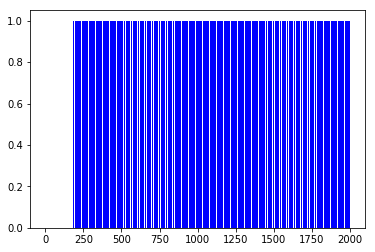

In [7]:
print("Success rate: " + str(sum(rList)/num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()